<a href="https://colab.research.google.com/github/yogeshsinghgit/Pwskills_Assignment/blob/main/Decision_Tree_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment -2

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

usp=sharing

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic EDA

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
data.shape

(768, 9)

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [13]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())



In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

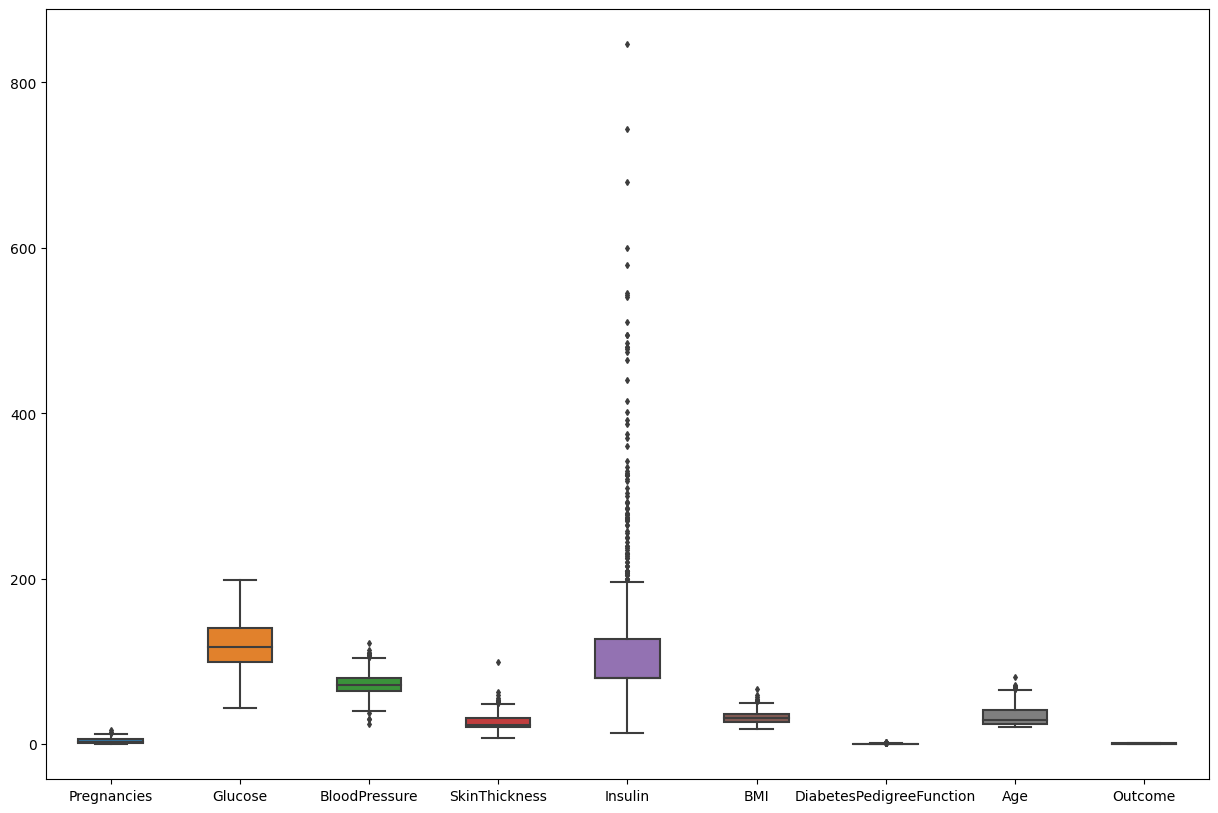

In [15]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

We can clearly see a lot of outliers in the dataset, but as we are working with decision tree algoritm so we don't need to standardized the features values to remove/control outliers.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [20]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [36]:
DTclf = DecisionTreeClassifier()

In [37]:
DTclf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
from sklearn import tree

[Text(0.559184350132626, 0.975, 'x[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.24701591511936338, 0.925, 'x[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(0.10543766578249338, 0.875, 'x[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(0.03183023872679045, 0.825, 'x[0] <= 7.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.021220159151193633, 0.775, 'x[6] <= 0.672\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.010610079575596816, 0.725, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.03183023872679045, 0.725, 'x[4] <= 53.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.021220159151193633, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.042440318302387266, 0.675, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.042440318302387266, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17904509283819628, 0.825, 'x[1] <= 127.5\ngini = 0.324\nsamples = 128\nvalue = [1

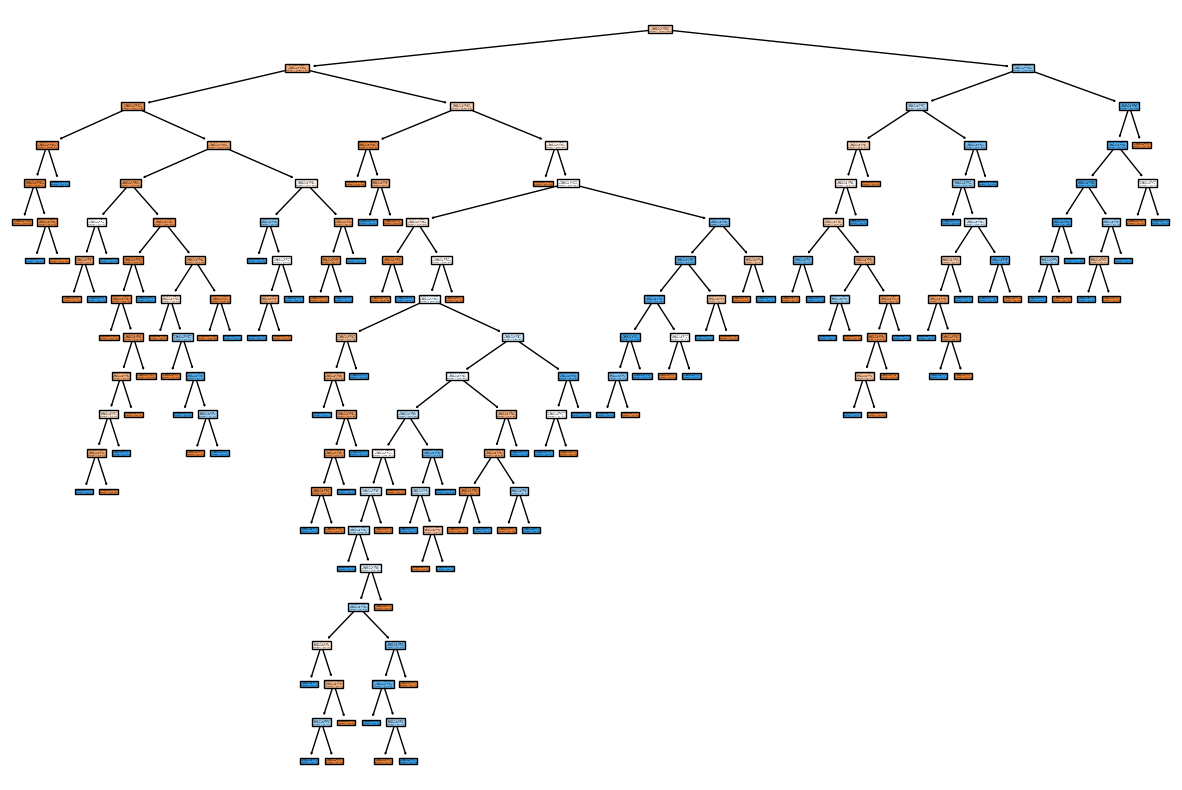

In [42]:
plt.figure(figsize=(15,10))
tree.plot_tree(DTclf,filled=True)

In [39]:
y_pred = DTclf.predict(X_test)

In [40]:
print(accuracy_score(y_pred, y_test))

0.765625


## Using hyperparameter tuning to find the best hyperparameter

In [43]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [44]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [45]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [46]:
## Train the data
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [48]:
y_pred=clf.predict(X_test)

In [49]:
accuracy_score(y_pred,y_test)

0.6770833333333334

In [51]:
treeclassifier = DecisionTreeClassifier(criterion= 'gini',max_depth= 4, max_features = 'log2',splitter= 'random')

In [53]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2', splitter='random')

[Text(0.6363636363636364, 0.9, 'x[1] <= 189.749\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.36363636363636365, 0.7, 'x[5] <= 44.767\ngini = 0.455\nsamples = 564\nvalue = [367, 197]'),
 Text(0.18181818181818182, 0.5, 'x[6] <= 0.619\ngini = 0.444\nsamples = 531\nvalue = [354, 177]'),
 Text(0.09090909090909091, 0.3, 'x[1] <= 116.786\ngini = 0.413\nsamples = 405\nvalue = [287, 118]'),
 Text(0.045454545454545456, 0.1, 'gini = 0.201\nsamples = 212\nvalue = [188, 24]'),
 Text(0.13636363636363635, 0.1, 'gini = 0.5\nsamples = 193\nvalue = [99, 94]'),
 Text(0.2727272727272727, 0.3, 'x[1] <= 92.983\ngini = 0.498\nsamples = 126\nvalue = [67, 59]'),
 Text(0.22727272727272727, 0.1, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.3181818181818182, 0.1, 'gini = 0.5\nsamples = 110\nvalue = [55, 55]'),
 Text(0.5454545454545454, 0.5, 'x[6] <= 0.856\ngini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.45454545454545453, 0.3, 'x[3] <= 35.894\ngini = 0.453\nsamples = 26\nvalue = 

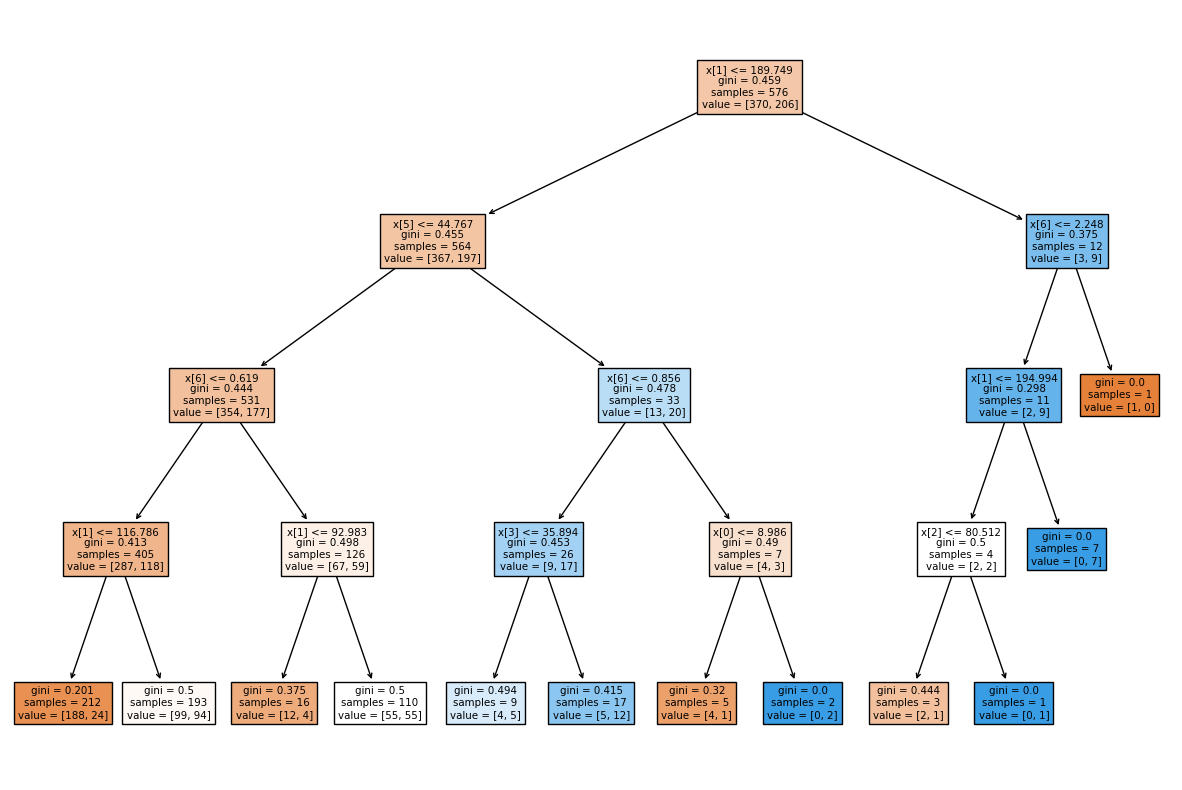

In [54]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)